---

## 판다스 (Pandas)

**Pandas 개요:** Pandas는 **행과 열로 이루어진 2차원 테이블 데이터**를 다루는 파이썬 라이브러리로,
**Series(1차원)** 와 **DataFrame(2차원)** 이라는 핵심 데이터 구조를 제공. 
 Database의 테이블이나 Excel 시트처럼 **인덱스(행 식별자)** 와 **컬럼 이름(열 식별자)** 을 가지며, 강력한 **데이터 인덱싱, 정렬, 집계, 결합** 기능을 지원합니다.
  Pandas는 파일(CSV, 엑셀)이나 DB로부터 데이터를 읽어오거나, NumPy 배열/딕셔너리로부터 **DataFrame을 직접 생성**할 수 있습니다.

### DataFrame 생성

DataFrame은 여러 가지 방식으로 생성할 수 있습니다. 대표적으로 **딕셔너리**나 **2차원 리스트**로부터 생성하는 방법이 있습니다:

In [3]:
import pandas as pd
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


위와 같이 딕셔너리 `data`의 **키를 컬럼 이름**으로, **값 리스트를 컬럼 값**으로 하여 DataFrame `df`를 만들었습니다. Index는 지정하지 않으면 0부터 자동 할당됩니다.

2차원 리스트로도 생성 가능합니다. 이 경우 **index 이름**과 **columns 이름**을 직접 지정해줄 수 있습니다:

In [3]:
df2 = pd.DataFrame([[1, 2, 3], [4, 5, 6]], 
                   index=['row1', 'row2'], 
                   columns=['A', 'B', 'C'])
df2

,A,B,C
row1,1,2,3
row2,4,5,6


이처럼 `df2`는 'row1','row2'라는 행 인덱스와 'A','B','C' 컬럼을 가지는 2x3 표 형식의 데이터입니다.

### 데이터 조회와 인덱싱

Pandas DataFrame에서는 **행과 열을 이름 또는 위치** 로 선택할 수 있습니다. 주요 인덱싱 방법:
- `DF.loc[행라벨, 열라벨]` : 행과 열을 **이름(label)** 으로 선택.
- `DF.iloc[행번호, 열번호]` : 행과 열을 **숫자 위치(index)** 로 선택.

In [4]:
grade = pd.DataFrame({
    'korean': [90, 80, 70, 60, 50],
    'math':   [88, 88, 66, 55, 44]
}, index=['id-1', 'id-3', 'id-2', 'id-5', 'id-4'])
grade

,korean,math
id-1,90,88
id-3,80,88
id-2,70,66
id-5,60,55
id-4,50,44


## 주요 메소드

In [10]:
# grade.head(3)              # 상위 3개
# grade.tail(3)              # 하위 3개
# grade.info()              # 요약 정보
# grade.describe()          # 수치형 요약 통계
# grade.shape               # (행, 열)
# grade.dtypes              # 각 컬럼 타입
# grade.isnull()            # 결측치 True/False
# grade.notnull()           # 결측치가 아닌 값 True/False
# grade.dropna()            # 결측치 제거
# grade.fillna(0)           # 결측치 0으로 대체
# grade['math'].value_counts()  # 고유값 개수 세기
# grade['math'].unique()     # 고유값 리스트

In [14]:
grade.loc['id-1']               # 행 'id-1'의 전체 데이터 (Series로 반환)

grade.loc[['id-2','id-5']]      # 행 'id-2', 'id-5' 선택 (DataFrame으로 반환)

grade.loc['id-2':'id-4']        # 'id-2'부터 'id-4'까지 슬라이싱 (끝 포함)

grade.loc['id-2', 'math']       # 특정 행의 특정 열 값


np.int64(66)

- `grade.loc['id-1']`은 해당 행의 두 과목 점수를 **Series**로 반환 (인덱스는 컬럼명) 
- `grade.loc[['id-2','id-5']]`는 여러 행을 선택하여 **DataFrame**으로 반환.  
- `grade.loc['id-2':'id-4']`처럼 **슬라이싱**할 경우 **끝 인덱스도 포함**되는 것 주의 ! 
- `grade.loc['id-2','math']`는 특정 행의 특정 열, 즉 단일 값(`66`)을 반환

In [18]:
grade.iloc[0]           # 첫 번째 행 (index 0에 해당, id-1 행)

grade.iloc[[1, 3]]      # 두 번째, 네 번째 행 (id-3, id-5)

grade.iloc[1:4]         # 1~3번째 행 (슬라이싱, id-3 ~ id-5)

grade.iloc[1, 0]        # 두 번째 행, 첫 번째 열 (id-3 행의 korean 점수)

np.int64(80)

`.iloc`은 파이썬 리스트/넘파이 인덱싱처럼 0부터 시작하는 정수
- `iloc[0]`은 첫 행(id-1) 
- `iloc[1:4]`는 1,2,3번째 행 (id-3, id-2, id-5)을 포함 
- `iloc[1,0]`은 id-3의 korean 점수 80을 반환

`DF['컬럼명']`으로 컬럼을 선택하거나, 조건식을 사용한 Boolean 인덱싱 등 다양한 인덱싱 방법을 Pandas는 제공합니다.

In [20]:
grade["korean"]             # korean 컬럼

grade[["korean","math"]]    # korean, math 컬럼

# 컬럼으로 조회는 indexing만 가능하다. (Slicing은 안됨.)

,korean,math
id-1,90,88
id-3,80,88
id-2,70,66
id-5,60,55
id-4,50,44


## query() 를 이용한 boolean indexing
- boolean index을 추상화한 메소드.
-   query(조회조건)
    -   sql의 where 절의 조건 처럼 문자열의 query statement를 이용해 조건으로 조회
    -   boolean index에 비해
        -   장점: 편의성(문자열로 query statement를 만들므로 동적 구문 생성등 다양한 처리가 가능)과 가독성이 좋다.
        -   단점: 속도가 느리다.
-   조회조건 구문
    -   `"컬럼명 연산자 비교값"`
-   외부변수를 이용해 query문의 비교값을 지정할 수 있다.
    -   query 문자열 안에서 @변수명 사용
    -   f string이나 format() 함수를 이용해 query를 만들 수도 있다.


### query 메소드사용 연산자 
-   **비교 연산자**
    -   ==, \>, \>=, \<, \<=, !=
-   **결측치 비교**
    -   컬럼.isna(), isnull()
    -   컬럼.notna(), notnull()
-   **논리 연산자**
    -   and, or, not
-   **in 연산자**
    -   in, ==
    -   not in, !=
    -   비교 대상값은 리스트에 넣는다.
-   **Index name으로 검색**
    -   행의 index 이름으로 검색
-   **문자열 부분검색(sql의 like)**
    -   컬럼명.str.contains(문자열): 문자열을 포함하고 있는
    -   컬럼명.str.startswith(문자열): 문자열로 시작하는
    -   컬럼명.str.endswith(문자열): 문자열로 끝나는
    -   **문자열 부분검색을 할 컬럼에 결측치(NaN)이 있으면 안된다.**


In [22]:
import numpy as np
data_dict = {
    "name": ["김영수", "박영희", "오준호", "조민경", "박영희", "김영수"],
    "age": [23, 17, 28, 31, 23, 17],
    "email": [
        "kys@gmail.com",
        "pyh@gmail.com",
        "ojh@daum.net",
        "cmk@naver.com",
        "pyh@daum.net",
        np.nan,
    ],
}
df = pd.DataFrame(data_dict)
df

,name,age,email
0,김영수,23,kys@gmail.com
1,박영희,17,pyh@gmail.com
2,오준호,28,ojh@daum.net
3,조민경,31,cmk@naver.com
4,박영희,23,pyh@daum.net
5,김영수,17,NaN


In [25]:
# 비교연산
df.query("age == 17")
df.query('age > 25')
df.query('age != 28')

,name,age,email
0,김영수,23,kys@gmail.com
1,박영희,17,pyh@gmail.com
3,조민경,31,cmk@naver.com
4,박영희,23,pyh@daum.net
5,김영수,17,NaN


In [29]:
df.query("email.isna()") # 결측치인 행
df.query("email.isnull()")
df.query("email.notna()")  #결측치가 아닌 행.
df.query("email.notnull()")

,name,age,email
0,김영수,23,kys@gmail.com
1,박영희,17,pyh@gmail.com
2,오준호,28,ojh@daum.net
3,조민경,31,cmk@naver.com
4,박영희,23,pyh@daum.net


### 정렬 (Sorting)

Pandas DataFrame은 **인덱스**나 **특정 컬럼 값**을 기준으로 정렬 가능.
- `DF.sort_index(axis=0, ascending=True)`: 인덱스 기준 정렬 (`axis=1`이면 컬럼 이름 기준).  
- `DF.sort_values(by=컬럼명, ascending=True)`: 하나 또는 여러 컬럼값 기준 정렬.


-   <b style='font-size:1.2em'>sort_index(axis=0, ascending=True, inplace=False)</b>
    -   axis
        -   index 이름 기준 정렬(행) : 'index' 또는 0 (기본값)
        -   column 이름 기준 정렬(열) : 'columns' 또는 1
    -   ascending
        -   정렬방식
        -   True(기본): 오름차순, False: 내림차순
    -   inplace
        -   원본에 적용 여부
        -   False(기본): 변경한 복사본 반환
        -   True : 원본을 변경
-   Index name을 정렬하면 앞의 몇글자만 가지고 slicing을 할 수 있다.
    -   ex) A로 시작하는 것에서 C로 시작하는 것 까지
    -   단 결측치(NA) 값이 index name에 있으면 안된다.


In [37]:

# By index (asc)
grade.sort_index()

# By index (desc)
grade.sort_index(ascending=False)

# By korean score (asc)
# grade.sort_values('korean')

# nBy korean desc, math asc
grade.sort_values(['math', 'korean'], ascending=[False, True])


,korean,math
id-3,80,88
id-1,90,88
id-2,70,66
id-5,60,55
id-4,50,44


- 인덱스 오름차순 정렬 결과를 보면 'id-1' ~ 'id-5' 순으로 정렬되었습니다. (내림차순의 경우 역순)  
- `sort_values('korean')`은 korean 점수 기준 오름차순입니다.  
- 복수 컬럼으로 정렬할 때 `ascending` 리스트를 전달하여 개별 정렬 순서를 줄 수 있습니다. 위에서 "korean 내림차순, math 오름차순"으로 정렬하여 동일 korean 점수일 경우 math 점수가 작은 순으로 정렬되도록 했습니다.

### 집계와 통계 연산

Pandas는 데이터의 **요약 통계량**을 계산하거나, 그룹별로 집계할 수 있는 다양한 기능을 제공합니다.

# 기술통계 메소드들을 이용한 데이터 집계

## 주요 기술통계 메소드

| 함수           | 설명                      |
| -------------- | ------------------------- |
| **sum()**      | 합계                      |
| **mean()**     | 평균                      |
| **median()**   | 중위수                    |
| **mode()**     | 최빈값                    |
| **quantile()** | 분위수                    |
| **std()**      | 표준편차                  |
| **var()**      | 분산                      |
| **count()**    | 결측치를 제외한 원소 개수 |
| **min()**      | 최소값                    |
| **max()**      | 최대값                    |
| **idxmax()**   | 최대값 index              |
| **idxmin()**   | 최소값 index              |
| **unique()**   | 고유값                    |
| **nunique()**  | 고유값의 개수             |

<center><b style='font-size:1.2em'>cf) value_counts()는 Series에만 사용할 수 있다.</b></center>


예를 들어 `grade` DataFrame의 과목별 평균과 학생별 평균을 구해보겠습니다:

In [87]:
# 과목 평균
grade.mean()

korean    70.0
math      68.2
dtype: float64

In [89]:
# 학생 개인 평균
grade.mean(axis=1)

id-1    89.0
id-3    84.0
id-2    68.0
id-5    57.5
id-4    47.0
dtype: float64

## 그룹별 집계 (groupby)

 DataFrame을 특정 컬럼 값에 따라 그룹으로 묶은 뒤 집계하는 것이 가능 
`DF.groupby('기준컬럼')`으로 그룹 객체를 만들고, 이어서 집계 연산을 적용. 또는 한 번에 `DF.groupby('기준컬럼')['타겟컬럼'].agg(함수)` 형태로 사용 가능

In [39]:
df_dept = pd.DataFrame({'Dept': ['Sales', 'Sales', 'IT', 'IT', 'HR'],
                        'Salary': [200, 250, 300, 220, 270]})
df_dept

,Dept,Salary
0,Sales,200
1,Sales,250
2,IT,300
3,IT,220
4,HR,270


In [40]:
# dept 컬럼 기준으로 salary의 평균
df_dept.groupby('Dept')['Salary'].mean()

Dept
HR       270.0
IT       260.0
Sales    225.0
Name: Salary, dtype: float64

In [67]:
# dept 컬럼을 기준으로 salary의 평균, 합계, 원소 개수 카운트.
df_dept.groupby('Dept')['Salary'].agg(['mean', 'sum', 'count'])

,mean,sum,count
Dept,,,
HR,270.0,270,1
IT,260.0,520,2
Sales,225.0,450,2


- 첫 번째 출력은 Dept별 Salary의 평균을 Series로  
- 두 번째 출력은 `agg()`에 리스트로 여러 함수를 전달하여 부서별로 Salary의 mean, sum, count를 동시에 구한 결과

**사용자 정의 집계 함수**도 전달할 수 있으며, 복수 컬럼에 대해 서로 다른 집계 함수를 적용하는 딕셔너리 가능

In [91]:
###  최대 최소값의의 차이를 집계하는 사용자 정의 집계함수.
def min_max_diff(column):
    return column.max() - column.min()

In [92]:
df_dept.groupby('Dept')['Salary'].agg(min_max_diff)

Dept
HR        0
IT       80
Sales    50
Name: Salary, dtype: int64

# pivot_table()

엑셀의 pivot table 기능을 제공하는 메소드.  
분류별 집계(Group으로 묶어 집계)를 처리하는 함수로 group으로 묶고자 하는 컬럼들을 행과 열로 위치시키고 집계값을 값으로 보여준다.  
역할은 `groupby()`를 이용한 집계와 같은데 **여러개 컬럼을 기준으로 groupby 를 할 경우 집계결과를 읽는 것이 더 편하다.(가독성이 좋다)**

> pivot() 함수와 역할이 다르다.  
> pivot() 은 index와 column의 형태를 바꾸는 reshape 함수.

-   `DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')`
-   **매개변수**
    -   **index**
        -   문자열 또는 리스트. index로 올 컬럼들 => groupby였으면 묶었을 컬럼
    -   **columns**
        -   문자열 또는 리스트. column으로 올 컬럼들 => groupby였으면 묶었을 컬럼 (index/columns가 묶여서 groupby에 묶을 컬럼들이 된다.)
    -   **values**
        -   문자열 또는 리스트. 집계할 대상 컬럼들
    -   **aggfunc**
        -   집계함수 지정. 함수, 함수이름문자열, 함수리스트(함수이름 문자열/함수객체), dict: 집계할 함수
        -   기본(생략시): 평균을 구한다. (mean이 기본값)
    -   **fill_value, dropna**
        -   fill_value: 집계시 NA가 나올경우 채울 값
        -   dropna: boolean. 컬럼의 전체값이 NA인 경우 그 컬럼 제거(기본: True)
    -   **margins/margins_name**
        -   margin: boolean(기본: False). 총집계결과를 만들지 여부.
        -   margin_name: margin의 이름 문자열로 지정 (생략시 All)


In [41]:
import pandas as pd
df = pd.read_csv('data/flights.csv')
df.shape

(58492, 14)

### 두개의 컬럼을 grouping 해서 집계

-   항공사/출발공항코드 별 취소 총수 (1이 취소이므로 합계를 구한다.)
-   사용컬럼
    -   grouping할 컬럼
        -   AIRLINE: 항공사
        -   ORG_AIR: 출발 공항코드
    -   집계대상컬럼
        -   CANCELLED: 취소여부 - 1:취소, 0: 취소안됨
-   집계: sum


In [42]:
df.groupby(["AIRLINE", "ORG_AIR"])['CANCELLED'].sum()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
                    ..
WN       LAS         7
         LAX        32
         MSP         1
         PHX         6
         SFO        25
Name: CANCELLED, Length: 114, dtype: int64

In [99]:
df.pivot_table(
    index="AIRLINE",    # group으로 묶을 컬럼 중 행에 놓을것
    columns="ORG_AIR",  # group으로 묶을 컬럼 중 열에 놓을것
    values="CANCELLED", # 집계할 컬럼
    aggfunc="sum",      # 집계 함수, 생략하면 mean이 default
    margins=True,       # index 별, column 별 집계결과를 뒤에 붙여준다.
    margins_name="총 취소 건수",    # margins=True일 때 컬럼/행 이름 지정. 생략하면
    fill_value=-999,    # 결측치대신 넣을 값.
)

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO,총 취소 건수
AIRLINE,,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2,154
AS,0,0,0,0,0,0,0,0,0,0,0
B6,-999,0,0,-999,0,0,-999,0,0,1,1
DL,28,1,0,0,1,1,4,0,1,2,38
EV,18,6,27,36,-999,-999,6,53,0,-999,146
F9,0,2,1,0,1,1,1,4,0,0,10
HA,-999,-999,-999,-999,0,0,-999,-999,0,0,0
MQ,5,-999,62,0,-999,0,0,85,-999,-999,152
NK,1,1,6,0,1,1,3,10,2,-999,25


# cut() - 연속형(수치형)을 범주형으로 변환

-   cut() : 지정한 값을 기준으로 구간을 나눠 그룹으로 묶는다.
    -   `pd.cut(x, bins,right=True, labels=None)`
    -   매개변수
        -   **x**: 범주형으로 바꿀 대상. 1차원 배열형태(Series, 리스트, ndarray)의 자료구조
        -   **bins**: 범주로 나눌때의 기준값(구간경계)들을 리스트로 묶어서 전달한다.
        -   **right**: 구간경계의 오른쪽(True-기본)을 포함할지 왼쪽(False)을 포함할지
        -   **labels**: 각 구간(범주)의 label을 리스트로 전달
            -   생략하면 범위를 범주명으로 사용한다. (ex: (10, 20], ()-포함안함, []-포함)


In [44]:
np.random.seed(42)
d = {
    "age": np.random.randint(1, 100, size=30),
    "tall": np.round(np.random.normal(170, 10, size=30), 2),
}
df = pd.DataFrame(d)
df

,age,tall
0,52,159.87
1,93,173.14
2,15,160.92
3,72,155.88
4,61,184.66
5,21,167.74
6,83,170.68
7,87,155.75
8,75,164.56
9,75,171.11


> ### np.random.normal(평균, 표준편차, size=개수): 정규분포를 따르는 난수 생성
> - 난수란 예측할 수 없고 일정한 규칙이 없는, 임의로 발생하는 수를 의미한다. 주로 통계적 분석이나 알고리즘에서 무작위성을 구현할 때 사용된다.
> - 특정 데이터 분포를 이용해 난수를 발생시키면, 해당 분포의 특성을 따르는 난수가 생성되도록 제어할 수 있다.
>   
> #### 데이터 분포
> - 분포의 사전적의미는 특정 범위나 구역 내에서 사물이나 현상이 퍼져 있는 상태를 의미
> - **데이터 분포는** 값들이 전체 범위 내에서 어떻게 퍼져 있는지를 나타내는 패턴이다. 이를 통해 데이터의 중심 경향, 변동성, 대칭성 등을 파악할 수 있다.
> #### 정규분포:
> - 정규분포는 데이터가 **평균을 중심으로 좌우 대칭**을 이루며 **종 모양의 분포**를 나타내는 확률 분포다. 평균 주변에 데이터들이 집중되고, 평균에서 멀어질수록 데이터의 빈도가 감소하는 특징을 가진다. 대표적인 예로 사람들의 키나 시험 점수가 정규분포를 따르는 경우가 많다.
> - 정규분포는 평균과 분산을 통해 표현된다.
> - 정규분포중 평균이 0이고 표준편차가 1인 것을 **표준 정규 분포** 라고 한다.
> - 정규분포를 이용한 난수
>     - 평균 +- 표준편차  범위: 대략 70% 분포됨.
>     - 평균 +- 표준편차 * 2 범위: 대략 95% 분포됨.
>     - 평균 +- 표준편차 * 3 범위: 대략 99% 분포됨.
> - ex)
>    - 평균: 170, 표준편차: 10, 100 개 난수 생성
>         - 160 ~ 180 : 70 개
>         - 150 ~ 190 : 95 개

In [45]:
나이대 = pd.cut(
    df['age'],    # 범주형으로 만들 수치형값들.
    bins=3,       # 몇개의 범주로 나눌지. (범위로 등분)  
    right=False   #default: True -> 등분 범위에 어느쪽을 포함시킬지.  # True: 끝 포함, False: 시작 포함
)

In [46]:
df['age'].head()

0    52
1    93
2    15
3    72
4    61
Name: age, dtype: int32

In [47]:
나이대.head() # []는 포함, ()는 미포함. [()] 크거나 같고 작거나 같고

0    [32.333, 62.667)
1    [62.667, 93.091)
2       [2.0, 32.333)
3    [62.667, 93.091)
4    [32.333, 62.667)
Name: age, dtype: category
Categories (3, interval[float64, left]): [[2.0, 32.333) < [32.333, 62.667) < [62.667, 93.091)]

In [48]:
pd.DataFrame({"age": df['age'], "나이대":나이대})
# 10 ~ 36, 36 ~ 62, 62 ~ 89

,age,나이대
0,52,"[32.333, 62.667)"
1,93,"[62.667, 93.091)"
2,15,"[2.0, 32.333)"
3,72,"[62.667, 93.091)"
4,61,"[32.333, 62.667)"
5,21,"[2.0, 32.333)"
6,83,"[62.667, 93.091)"
7,87,"[62.667, 93.091)"
8,75,"[62.667, 93.091)"
9,75,"[62.667, 93.091)"


# apply() - Series, DataFrame의 데이터 일괄 처리

데이터프레임의 행들과 열들 또는 Series의 원소들에 공통된 처리를 할 때 apply 함수를 이용하면 반복문을 사용하지 않고 일괄 처리가 가능하다.

-   DataFrame.apply(함수, axis=0, args=(), \*\*kwarg)
    -   인수로 행이나 열을 받는 함수를 apply 메서드의 인수로 넣으면 데이터프레임의 행이나 열들을 하나씩 함수에 전달한다.
    -   매개변수
        -   **함수**: DataFrame의 행들 또는 열들을 전달할 함수
        -   **axis**: **0-컬럼(열)을 전달, 1-행을 전달 (기본값 0)**
        -   **args**: 함수에 행/열 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        -   **\*\*kwarg**: 함수에 행/열 이외에 전달할 매개변수를 키워드 인자로 전달
-   Series.apply(함수, args=(), \*\*kwarg)
    -   인수로 Series의 원소들을 받는 함수를 apply 메소드의 인수로 넣으면 Series의 원소들을 하나씩 함수로 전달한다.
    -   매개변수
        -   **함수**: Series의 원소들을 전달할 함수
        -   **args**: 함수에 원소 이외에 전달할 매개변수를 위치기반(순서대로) 튜플로 전달
        -   **\*\*kwarg**: 함수에 원소 이외에 전달할 매개변수를 키워드 인자로 전달


In [108]:
df = pd.read_csv("data/flights.csv")
df.columns

Index(['MONTH', 'DAY', 'WEEKDAY', 'AIRLINE', 'ORG_AIR', 'DEST_AIR',
       'SCHED_DEP', 'DEP_DELAY', 'AIR_TIME', 'DIST', 'SCHED_ARR', 'ARR_DELAY',
       'DIVERTED', 'CANCELLED'],
      dtype='object')

In [109]:
# 일괄처리 함수 (정수->요일 문자열로 변환)
import numpy as np
def convert_weekday(value:int)->str|None:
    '''
    숫자 요일을 받아서 문자열 요일로 출력

    value가 결측치
    '''
    if pd.isna(value):
        return np.nan
    return "월화수목금토일"[value-1]+"요일"
convert_weekday(3)
    

'수요일'

In [ ]:
df['WEEKDAY'].apply(convert_weekday)[125:140]

125    목요일
126    목요일
127    목요일
128    목요일
129    목요일
130    목요일
131    목요일
132    목요일
133    목요일
134    목요일
135    목요일
136    금요일
137    금요일
138    금요일
139    금요일
Name: WEEKDAY, dtype: object

### 데이터 합치기 (Merge, Join, Concat)

현실 데이터에서는 여러 데이터 소스를 **병합(merge)** 하거나 **연결(concatenate)** 하는 경우가 많음
. Pandas는 SQL의 JOIN처럼 두 DataFrame을 키를 기준으로 병합하는 `merge` 메서드와, 단순히 위아래 또는 좌우로 연결하는 `concat` 함수를 제공.

- **`pd.concat([DF1, DF2, ...], axis=0)`**: 행 방향으로 DataFrame들을 연결 (세로로 붙이기). `axis=1`이면 열 방향으로 붙임. 인덱스를 무시하려면 `ignore_index=True`.  
- **`DF1.merge(DF2, how='inner', on='키컬럼')`**: 키 컬럼 기준으로 두 DataFrame을 병합. `how`는 'inner'(교집합), 'outer'(합집합), 'left', 'right' 조인을 지정. (left/right는 첫 번째 혹은 두 번째 프레임 기준) 제약조건 자유롭게 사용가능, 조인이랑의 차이 알아두기

In [4]:
df1 = pd.DataFrame({'Val': [1, 2]})
df2 = pd.DataFrame({'Val': [3, 4]})
df1,df2

(   Val
 0    1
 1    2,
    Val
 0    3
 1    4)

In [51]:
# Vertical concat 
pd.concat([df1, df2])
pd.concat([df1, df2], ignore_index=True)


,Val
0,1
1,2
2,3
3,4


In [52]:
# Horizontal concat
pd.concat([df1, df2], axis=1)

,Val,Val
0,1,3
1,2,4


- 세로 연결 결과 인덱스가 0~3으로 재배열, 값이 위아래로 
- 가로 연결 결과는 인덱스를 기준으로 두 DataFrame이 좌우로 합쳐져 두 개의 'Val' 컬럼 반환

> ### 조인(join)
>
> -   여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> -   두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> -   Inner Join, Left Outer Join, Right Outer Join, Full Outer Join


## 조인을 통한 DataFrame 합치기

-   연관성있는 둘 이상의 DataFrame을 하나로 합친다.
    -   ex) 고객과 주문정보, 교수와 수업정보, 직원과 부서정보
-   **join()**
    -   **2개 이상**의 DataFrame을 조인할 때 사용
-   **merge()**
    -   **2개의** DataFrame의 조인만 지원


### join()

-   dataframe객체.join(others, how='left', lsuffix='', rsuffix='')
-   `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
-   두개 이상의 DataFrame들을 조인 할 수 있다.
    -   **조인 기준**: index name이 같은 값인 행끼리 합친다. (equi-join)
    -   **조인 기본 방식**: Left Outer Join
-   매개변수
    -   lsuffix, rsuffix
        -   합치는 DataFrame들 간에 **같은 이름의 컬럼이 있으면 exception 발생**
        -   같은 이름이 있는 경우 붙일 접미어 지정
    -   how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본

In [12]:
df1.join(df2)   # 컬럼명이 같아서 exception이 남.

ValueError: columns overlap but no suffix specified: Index(['ID'], dtype='object')

In [ ]:
df1.join(df2, rsuffix="1")

,ID,Name,ID1,Dept
0,1,A,2,X
1,2,B,3,Y
2,3,C,4,Z


In [31]:
df2.join(df1, lsuffix="1", how= "inner")

,ID1,Dept,ID,Name
0,2,X,1,A
1,3,Y,2,B
2,4,Z,3,C


`merge` 사용

In [41]:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['A', 'B', 'C']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Dept': ['X', 'Y', 'Z']})
print("df1:\n", df1)
print("\ndf2:\n", df2)
print("\nInner merge on ID:\n", df1.merge(df2, on='ID', how='inner'))
print("\nOuter merge on ID:\n", df1.merge(df2, on='ID', how='outer'))

df1:
    ID Name
0   1    A
1   2    B
2   3    C

df2:
    ID Dept
0   2    X
1   3    Y
2   4    Z

Inner merge on ID:
    ID Name Dept
0   2    B    X
1   3    C    Y

Outer merge on ID:
    ID Name Dept
0   1    A  NaN
1   2    B    X
2   3    C    Y
3   4  NaN    Z


- **Inner Join** 결과: df1과 df2에 모두 존재하는 ID(2,3)에 대해서만 병합되어 Name과 Dept가 모두 채워진 행 반환
- **Outer Join** 결과: 어느 한쪽에만 있어도 모두 포함 (ID 1은 df2에 Dept 정보가 없어 NaN, ID 4는 df1에 Name이 없어 NaN으로 표시).

위와 같이 `merge`를 통해 다양한 join 연산을 수행 가능. (`on`으로 키 컬럼 지정, 또는 `left_on`, `right_on`으로 서로 다른 컬럼명도 사용 가능, 동일 컬럼명이 겹칠 때는 `suffixes`로 접미어 지정 가능)

---

## Matplotlib 한글 처리 및 환경설정

Matplotlib를 사용할 때 **한글 폰트 문제**로 그래프의 한글 텍스트가 깨지는 현상이 발생함. 기본 폰트에는 한글 글꼴이 포함되어 있지 않기 때문.  **폰트를 한글이 지원되는 폰트로 변경**.

한글 폰트 설정 방법은 두 가지가 있습니다:
1. **Matplotlib 설정 파일**을 수정하여 전역 설정을 바꾸는 방법 (한번 설정하면 계속 유효).  
2. **코드 상에서 폰트 설정**을 변경하는 방법 (각 세션마다 설정 필요).

여기서는 코드에서 설정을 변경하는 방법을 사용해보겠습니다. Matplotlib의 `rcParams`를 통해 폰트를 변경 가능. Windows 사용자라면 "Malgun Gothic", Mac 사용자는 "AppleGothic" 등의 한글 폰트 이름을 지정. 또한 한글 표시를 위해 **마이너스 기호 깨짐 방지 설정**도 함께 함.

In [43]:

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'    # or 'AppleGothic' on macOS, etc.
plt.rcParams['axes.unicode_minus'] = False       # 한글 폰트 사용 시 마이너스 '-' 깨짐 방지


위 코드를 실행한 이후에는 그래프 제목, 축 레이블 등에 한글을 넣어도 제대로 표시됨. (주의: 해당 폰트가 시스템에 설치되어 있어야 함 !)

> **참고:** 설정이 제대로 되었는지 `plt.rcParams["font.family"]`를 출력해 확인 가능. 또한 Matplotlib 3.4버전부터는 `matplotlib.font_manager`의 `findfont`가 자동으로 한글 폰트를 찾아주는 기능이 개선되어, `NanumGothic` 폰트 등이 설치된 경우 보다 쉽게 처리되는 경우도 있다하더이다.

## Matplotlib 개요

Matplotlib는 **데이터 시각화**를 위한 가장 표준적인 파이썬 라이브러리입니다. 2D 그래프를 그리는 기능을 제공하며, 확장 패키지를 통해 3D 그래프도 지원. Pandas나 Seaborn 등의 고수준 시각화 라이브러리도 내부적으로 Matplotlib를 사용하여 그래프를 생성.

Matplotlib의 가장 기본 객체는 **Figure**와 **Axes**. Figure는 그래프가 그려질 전체 도화지에 해당하고, Axes는 그 도화지(Figure) 안에 실제 그래프가 그려지는 영역. 하나의 Figure에 여러 Axes(서브 플롯)을 배치하여 여러 개의 그래프를 한꺼번에 그릴 수 있음.

- **Figure**: 전체 그래프 캔버스 (예: 한 개의 창 또는 그림 파일 전체). `plt.figure()`로 생성.  
- **Axes**: 개별 플롯(좌표축)의 영역. 하나의 Figure에 여러 Axes를 넣을 수 있음. `fig.add_subplot()` 또는 `plt.subplots()`로 생성.  
- **Axis (x축, y축)**: 각 Axes의 가로축, 세로축으로 눈금(ticks)과 레이블(label)을 가짐.  
- **Title**: Axes 또는 Figure의 제목.  
- **Legend (범례)**: 하나의 Axes에 여러 개의 데이터 시리즈(그래프 선 등)가 있는 경우 각각을 설명하는 표식.

Matplotlib에서는 **상태 유지 인터페이스**(pyplot)와 **객체 지향 인터페이스**를 모두 사용 가능. 간단하게는 `plt.plot()` 등을 사용하여 바로 그릴 수 있지만, 복잡한 플롯은 Figure/Axes 객체를 직접 생성하고 다루는 방법이 유리.

# 그래프를 그리는 두가지 방식
- pyplot 모듈의 함수들을 사용.
- Figure와 Axes 객체의 메소드들을 사용.

In [53]:
# 그래프에 사용할 데이터
x = [1, 2, 3, 4, 5]
y = [10, 5, 30, 30, 50]

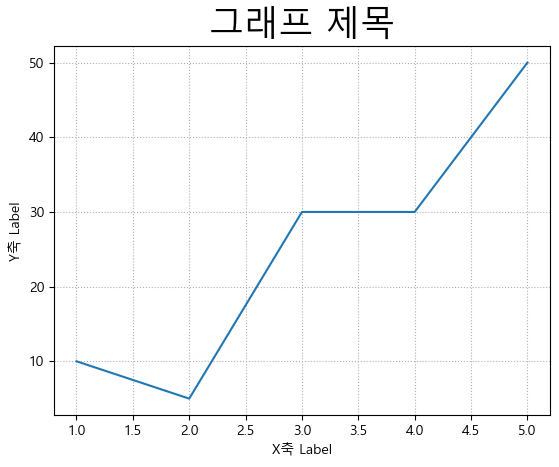

In [ ]:
# 그래프 그리기 (선그래프)
plt.plot(x, y)
### 그래프에 여러 설정
plt.title("그래프 제목", fontsize="25")
plt.xlabel("X축 Label")
plt.ylabel("Y축 Label")
plt.grid(True, linestyle=":")

# 파일로 저장
plt.savefig("line.png")
# 그래프를 화면에 출력
plt.show()

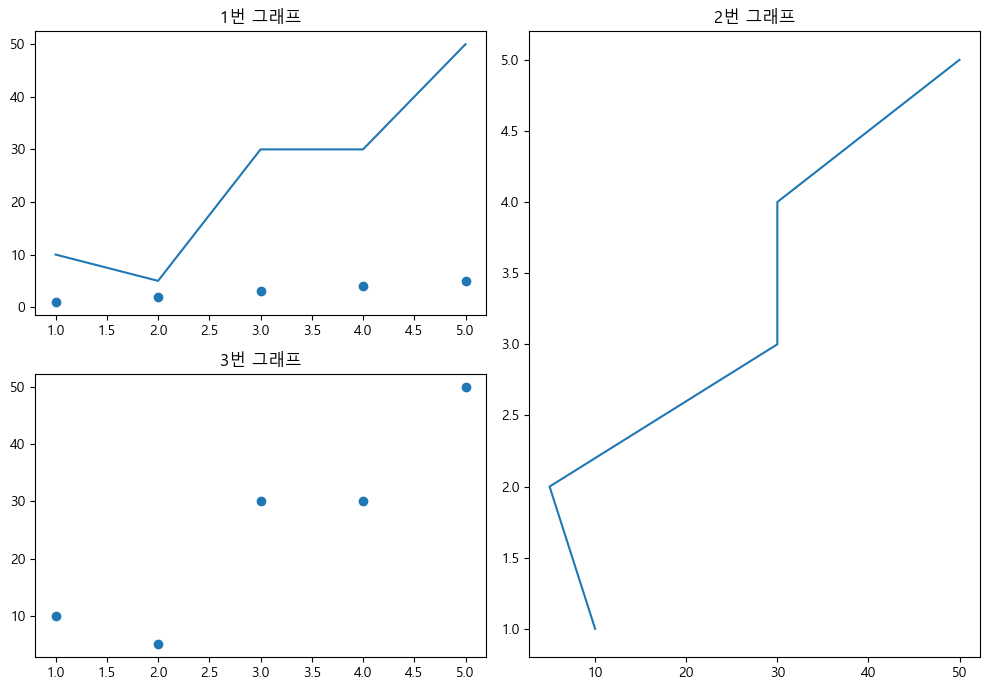

In [57]:
#2. 하나의 figure에 여러 그래프 그리기
    #- plt.subplot(row,columns,num)

# 전체 figure의 크기 변경
plt.figure(figsize=(10, 7))  # (좌우너비, 상하높이) 단위: inch

# 좌->우, 상->하  순번: 1부터 시작
plt.subplot(2, 2, 1)   # (2행, 2열의 행렬에서 첫번째 위치)       |1|2|
# 그래프 그리고 설정                                            |3|4|
plt.plot(x, y)
plt.scatter(x, x)   
plt.title("1번 그래프")

plt.subplot(1, 2, 2) # (1행, 2열, 두번째 위치)
plt.plot(y, x)
plt.title("2번 그래프")

plt.subplot(2, 2, 3) # (2행, 2열, 세번째 위치)
plt.scatter(x, y)
plt.title("3번 그래프")

plt.tight_layout()  # 공간 겹칠 떄 사용.
plt.show()

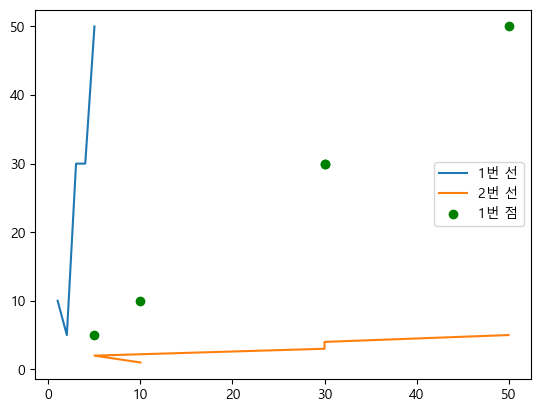

In [58]:
# 3. 하나의 axes에 여러 그래프를 그리기.
# 최종 출력 전에 그래프 그리는 함수들을 호출 하면 하나의 axes에 모두 그린다.
plt.plot(x, y, label="1번 선") # label: 그래프의 이름
plt.plot(y, x, label="2번 선")
plt.scatter(y, y, label="1번 점", color="green")
plt.legend() # 각 그래프의 label을 이용해서 범례를 출력 label.

plt.show()

## Figure 와 Axes 객체를 이용해 그리기 (객체지향 방식)

- AxesSubplot 객체(Axes를 표현하는 객체)의 메소드들을 이용해 그래프를 그린다.
- axes 생성 방법
    - plt.gca(): AxesSubplot
        - plt로 그래프를 그릴때 대상 axes 객체를 반환한다.
        - 하나의 figure에 하나의 Axes 만 사용할 경우 사용.
    - 하나의 figure에 여러개의 Axes들을 사용할 경우
        - figure.add_subplot() 메소드 이용
            - figure를 먼저 생성후 axes 들을 추가
        - pyplot.subplots() 함수를 이용
            - figure와 axes배열을 동시에 생성

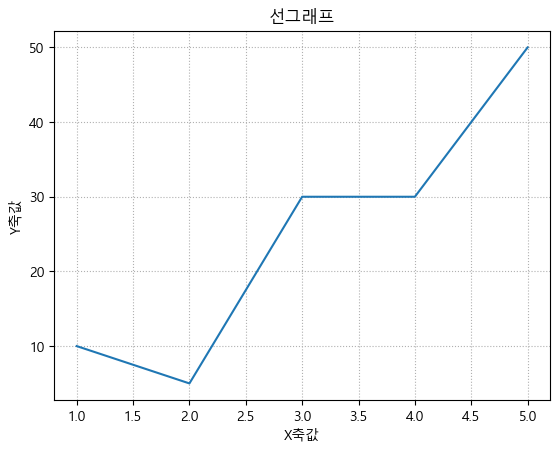

In [59]:
axes = plt.gca() # 그래프 그릴 Axes 객체를 생성.

# 그래프 그리기, 설정 메소드 -> Axes
axes.plot(x, y)
axes.set_title("선그래프")
axes.set_xlabel("X축값")
axes.set_ylabel("Y축값")
axes.grid(linestyle=":")

plt.show()

## Matplotlib 주요 그래프 그리기

Matplotlib를 이용하여 그릴 수 있는 **대표적인 그래프 종류**로 선 그래프, 산점도, 막대그래프, 파이차트, 히스토그램, 박스플롯 등이 있음.

### 선 그래프 (Line Plot)

선 그래프는 **시간 흐름에 따른 변화**나 함수의 추이를 나타낼 때 주로 사용. `plt.plot(x, y)` 함수를 사용. x 좌표와 y 좌표 배열을 인수로 전달하면 해당 점들을 선으로 연결한 그래프

In [151]:
# 그래프에 사용할 데이터
x = [1, 2, 3, 4, 5]
y = [10, 5, 30, 30, 50]

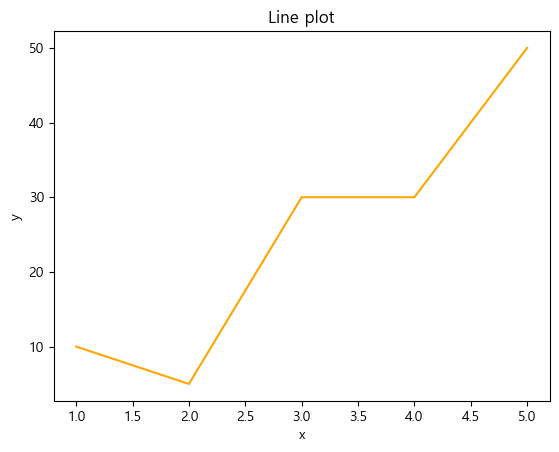

In [154]:
plt.plot(x, y, color='orange', marker='')  # x, y 값으로 선 그래프
plt.xlabel("x")         # x축 레이블
plt.ylabel("y")         # y축 레이블
plt.title("Line plot")  # 그래프 제목
plt.show()

### 산점도 (Scatter Plot)

산점도는 **두 변수 사이의 관계**나 데이터 분포의 군집을 볼 때 사용. `plt.scatter(x, y)` 함수로 x-y 좌표상의 점들을 표시. 옵션으로 점의 색깔(`c` 또는 `color`), 모양(`marker`), 투명도(`alpha`) 등을 지정할 수 있음.

In [61]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

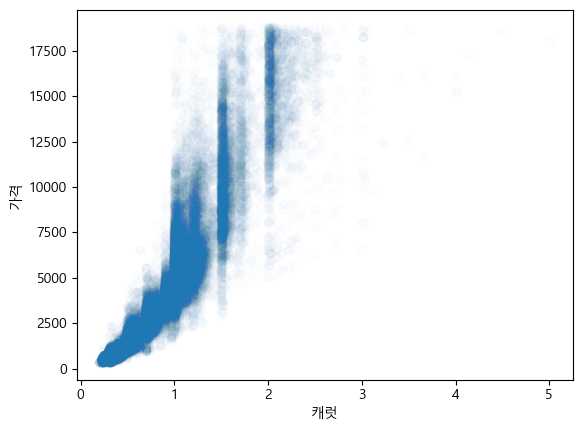

In [64]:
plt.scatter(df['carat'],  # x축에 들어갈 값
             df['price'], # y축에 들어갈 값. x, y의 같은 index 위치에 점을 찍는다.
             alpha=0.01    # 투명도. (투명)0 ~ 1(농도100%)
           )
plt.xlabel("캐럿")
plt.ylabel("가격")
plt.show()

> - ### 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - -1 ~ 1 사이의 값이 나온다. 
>         - 양의 상관관계: 0 ~ 1 (비례 관계) 
>         - 음의 상관관계: -1 ~ 0 (반비례 관계)
>         - 절대값 기준 1로 갈수록 두 변수의 상관관계가 강하고 0으로 갈수록 약하다.
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [ ]:
df[['price', 'carat']].corr() 

,price,carat
price,1.000000,0.921591
carat,0.921591,1.000000


### 막대그래프 (Bar Plot)

막대그래프는 **카테고리별 값의 크기 비교**에 많이 사용. `plt.bar(x, height)` 함수를 사용, `x`는 카테고리 (보통 문자열 목록)이고 `height`는 해당 값 리스트. `plt.barh`를 쓰면 가로 막대그래프도 그릴 수 있음.

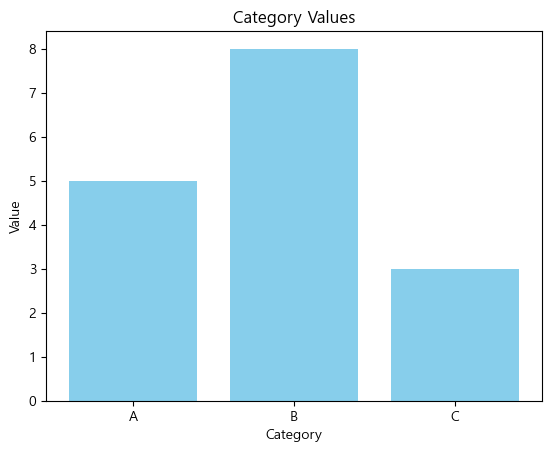

In [ ]:
categories = ['A', 'B', 'C']
values = [5, 8, 3]
plt.bar(categories, values, color='skyblue')
plt.title("Category Values")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

### 파이 차트 (Pie Chart)

파이 차트는 **전체 대비 부분의 비율**을 부채꼴 형태. `plt.pie(x, labels=..., autopct=...)` 함수로 그릴 수 있으며, `x`는 각 조각의 값 (비율로 자동 변환)입니다. `autopct` 인자로 비율 표시 형식을 지정할 수 있음 (예: '%1.1f%%'는 소수점1자리 퍼센트).

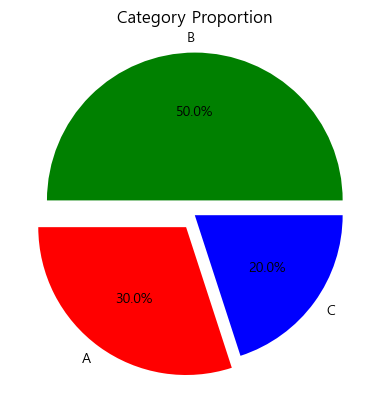

In [167]:
values = [50, 30, 20]
labels = ['B', 'A', 'C']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green','red','blue'],explode=[0.1, 0.1, 0])
plt.title("Category Proportion")
plt.show()

예제에서는 전체의 50%, 30%, 20%를 차지하는 3개의 범주를 파이차트 포현. 각 조각에는 비율이 표시되어 있으며, `explode` 파라미터를 사용하여 특정 조각을 돌출시킬 수도 있음.

### 히스토그램 (Histogram)

히스토그램은 **데이터 분포**를 구간별 빈도. 연속형 데이터의 분포 형태(치우침, 균등성 등)를 파악하는 데 유용. `plt.hist(data, bins)`로 사용, `bins`는 구간 개수 또는 경계값 리스트.

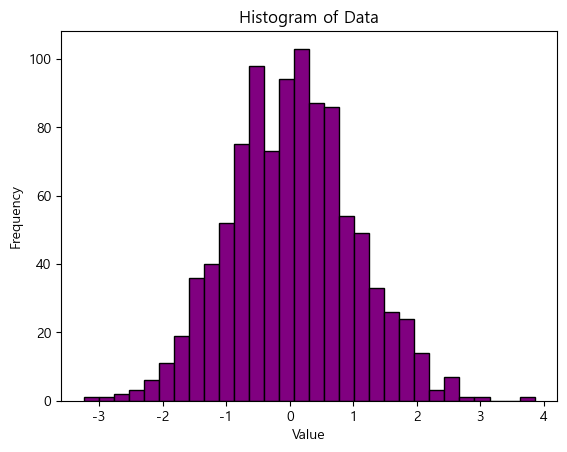

In [168]:

data = np.random.randn(1000)  # 평균0, 표준편차1인 정규분포 난수 1000개
plt.hist(data, bins=30, color='purple', edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


위 히스토그램에서 데이터가 평균 0을 중심으로 좌우 대칭적으로 분포하고 대부분 -2~2 사이에 몰려 있음. `edgecolor='black'`으로 막대 경계선을 그려 구분함. bins 개수를 늘리면 더 세밀한 분포를, 줄이면 더 거친 분포를 보여주므로 적절한 값을 선택해야 함.

### 박스플롯 (Boxplot)

박스플롯은 **데이터 분포의 요약 통계**(중앙값, 사분위 범위, 이상치)를 그림으로 나타냄. `plt.boxplot(data_list)` 형태로 사용하며, 여러 데이터 리스트를 전달하면 각각의 분포를 나란히 비교할 수 있음.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_11748\3233010505.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Data1', 'Data2'])


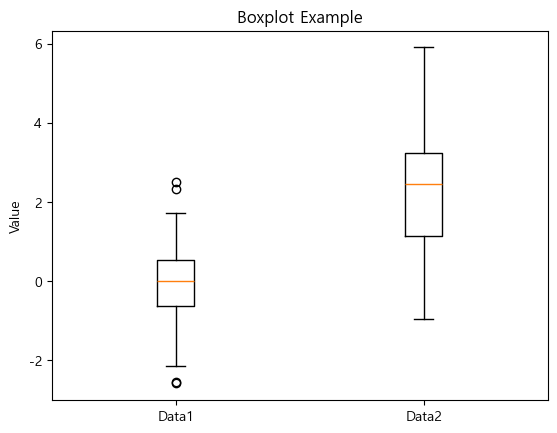

In [170]:
data1 = np.random.normal(0, 1, size=100)   # 평균0, 표준편차1
data2 = np.random.normal(2, 1.5, size=100) # 평균2, 표준편차1.5
plt.boxplot([data1, data2], labels=['Data1', 'Data2'])
plt.title("Boxplot Example")
plt.ylabel("Value")
plt.show()

박스플롯에서 **상자(box)**는 1사분위수(Q1)와 3사분위수(Q3)를 나타내고, 상자 안의 가로선은 중앙값(median). 상자 위아래의 수직선(whisker)은 Q1-1.5IQR과 Q3+1.5IQR 범위(즉 통상적인 데이터 범위)를 나타내고, 범위를 벗어난 점들은 **이상치(outlier)**로 표시됨. 위 예시에서 Data2 분포는 Data1보다 중앙값이 높고 분산이 더 큰 것을 알 수 있음.

---

## Pandas 시각화

Pandas는 Series와 DataFrame 객체에 `.plot()` 메서드를 제공하여 **Matplotlib 기반의 시각화**를 쉽게 할 수 있도록 함. 이는 데이터 분석 단계에서 빠르게 시각화를 확인하는 데 유용함. `Series.plot`이나 `DataFrame.plot`을 호출하면 내부적으로 Matplotlib을 사용하여 그래프를 그리고, 추가적인 꾸미기(제목, 축라벨 등)는 Matplotlib 함수를 함께 호출하여 적용.

`DataFrame.plot(kind='...')` 또는 `Series.plot(kind='...')`에서 `kind` 옵션으로 그래프 종류를 지정할 수 있음:  
- `'line'` (기본값) – 선그래프  
- `'bar'` / `'barh'` – 세로 / 가로 막대그래프  
- `'hist'` – 히스토그램  
- `'box'` – 박스플롯  
- `'kde'` – 커널밀도추정 그래프 (연속분포 밀도)  
- `'pie'` – 파이차트  
- `'scatter'` – 산점도 (`DataFrame.plot.scatter(x='col1', y='col2')` 같이 호출)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성
data = {
    "국어": [90, 80, 70, 60],
    "영어": [85, 75, 65, 55],
    "수학": [95, 85, 75, 65]
}
df = pd.DataFrame(data, index=["A반", "B반", "C반", "D반"])
df


,국어,영어,수학
A반,90,85,95
B반,80,75,85
C반,70,65,75
D반,60,55,65


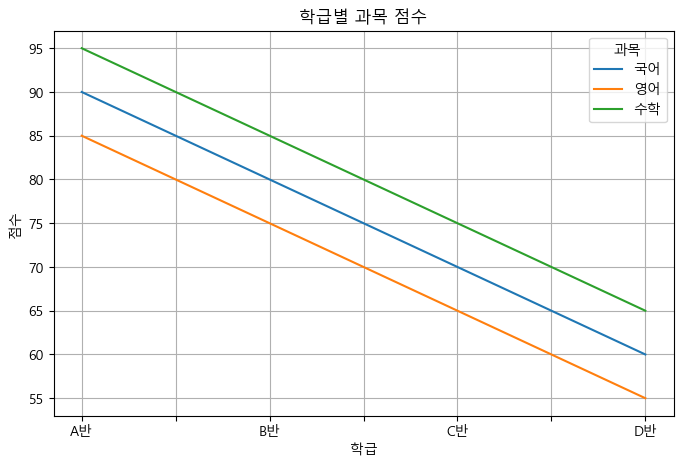

In [51]:
# 선 그래프
df.plot(title="학급별 과목 점수", figsize=(8, 5), grid=True)
plt.xlabel("학급")
plt.ylabel("점수")
plt.legend(title="과목")
plt.show()

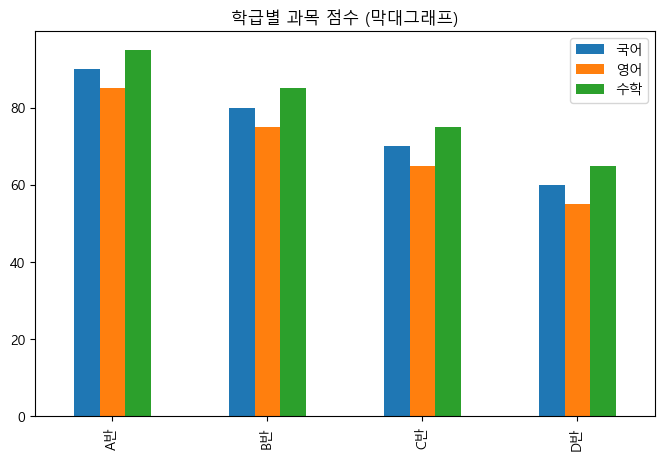

In [52]:
# 막대 그래프
df.plot(kind="bar", title="학급별 과목 점수 (막대그래프)", figsize=(8,5))
plt.show()

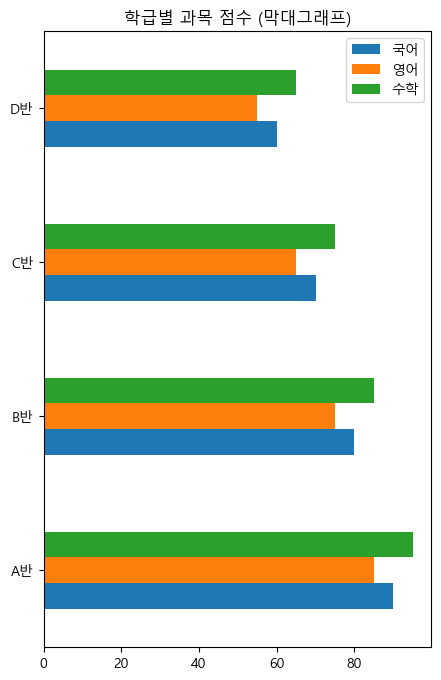

In [69]:
# 막대 그래프
df.plot(kind="barh", title="학급별 과목 점수 (막대그래프)", figsize=(5,8))
plt.show()

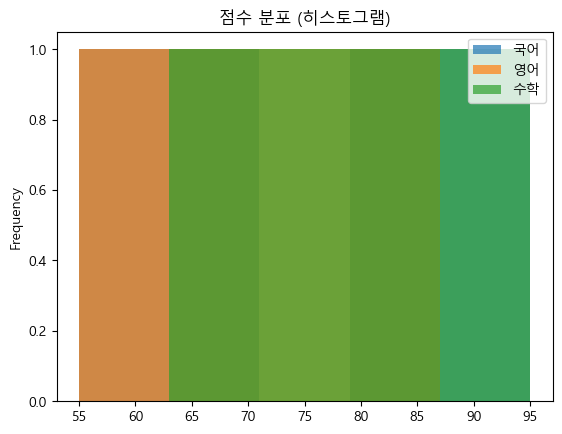

In [86]:
# 히스토그램
df.plot(kind="hist", alpha=0.7, bins=5, title="점수 분포 (히스토그램)")
plt.show()

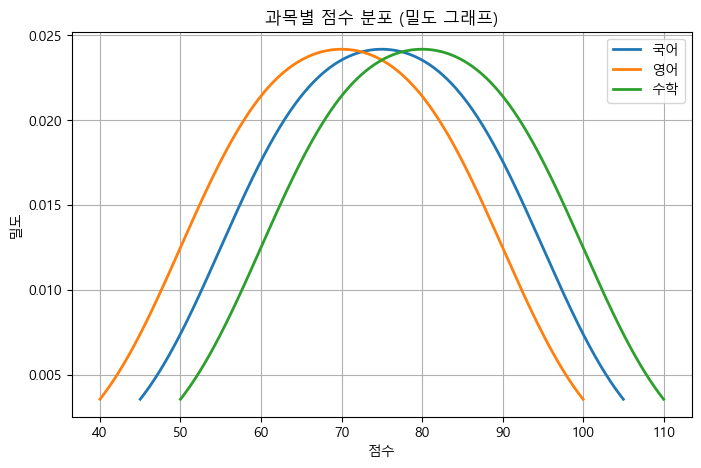

In [79]:
# KDE(밀도그래프)
df.plot(kind="kde", title="과목별 점수 분포 (밀도 그래프)", figsize=(8, 5), linewidth=2)
plt.grid(True)
plt.xlabel("점수")
plt.ylabel("밀도")
plt.show()

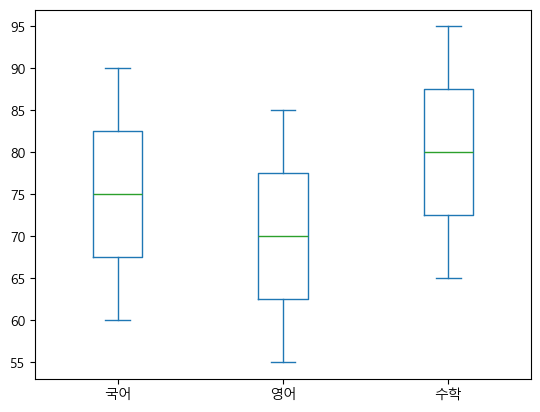

In [ ]:
# 상자그래프
df.plot(kind="box")
plt.show()

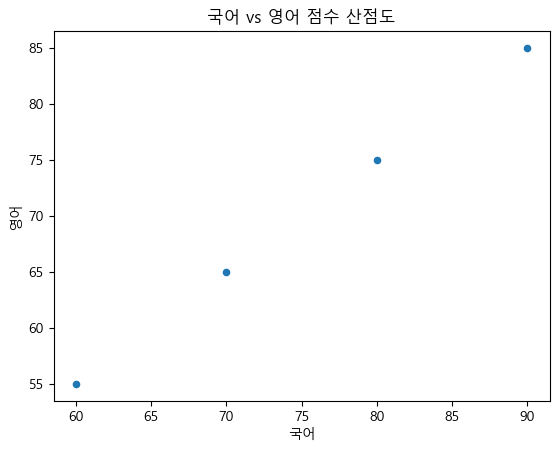

In [61]:
# 산점도 (하나의 컬럼만 사용 가능)
df.plot(kind="scatter", x="국어", y="영어", title="국어 vs 영어 점수 산점도")
plt.show()

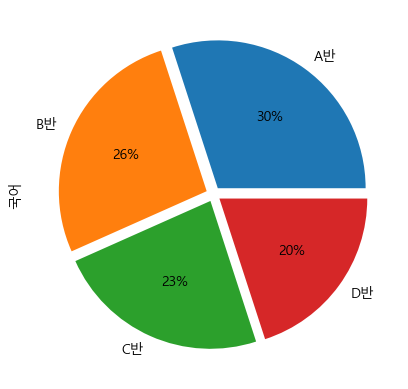

In [78]:
df["국어"].plot(kind="pie", autopct="%d%%", explode=[0.05,0.05,0.05,0.05])
plt.show()

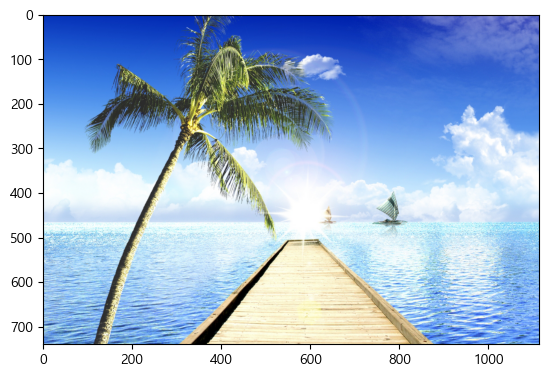

In [ ]:
# plt.imshow() : 원래 기능 - 이미지출력
from PIL import Image
import numpy as np

img = np.array(Image.open("image.jpg"))
plt.imshow(img)
plt.show()